# Project 1 - COVID-19 Data Analysis

**Project deadline:** This project is due for submission on Monday, 25.05.2020. You receive details on the submission process from your tutor!

**PLEASE READ THIS NOTEBOOK COMPLETELY BEFORE YOU START TO WORK ON THE PROJECT!**

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignmentts, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We aim to hand-out six projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The projects need to be submitted to your tutor and he will give you necessary information on the submission process!
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you must not use code or code-parts from your student peers in your project solutions!**

**Note: The tutors, Oliver and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!**

## Analysis of public COVID-19 data

In this first project, we would like to demonstrate that you can do advanced data analysis already with your current knowledge and with just a few lines of `Python`-code. Nevertheless the notebook contains some more advanced technical aspects to load data from the WWW and to prepare them for further analysis. Please do not worry if you do not fully understand all details of that part right now. We will cover those aspects later in the term.

We will do this project with a topic concerning all of us the moment, the COVID-19 pandemy. We will download publicly available data with a daily listing of new (known!) COVID-19 cases and new deaths due to the pandemy. The data set contains information on *all* countries with known COVID-19 cases. Your task will be to analyse the development of the pandemy and to check which countries currently do have a raising number of infectious COVID-19 patients.

The data that we will use in this notebook are daily updated and published by the [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide).

In [1]:
# We need some modules (Python libraries) in the following.
# Usually, such modules are loaded in the first cell of a notebook.
# The modules that we need concern loading the data and plotting
# them later.

# all plots should appear directly within the notebook
%matplotlib inline

# modules necessary for plotting
import matplotlib.pyplot as plt

# seaborn just makes plots look a bit nicer - not
# absolutely necessary though.
import seaborn as sns
sns.set_style("whitegrid")

# modules to load the data. The Pandas module
# is just needed for a quick data-loading demonstration at the
# start of the Notebook. The corona_data module is self-made
# to comfortably load and administrate the COVID-19 data.
# To work correctly, a file named 'corona_data.py' must be
# in the same directory as this notebook file!
import pandas as pd
import corona_data

# module to make avilable data structures and routines
# for numerics
import numpy as np

## Loading data

### Data-loading demo with standard Python-modules

One great feature of `Python` is the ability to load all kinds of standardised data-formats into memory - in most cases with a single command. The data can be located on your disk or on the Web. In the following, we directly load data from [this Web-address](https://opendata.ecdc.europa.eu/covid19/casedistribution/csv) (no need to separately download them).

In [2]:
# load COVID-19 data from the WEB with the pandas-modult
data = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/', engine="python")

# Uncomment the following line if you want to see all lines
# (more than 15000) and not only 10:
#pd.set_option('display.max_rows', None)
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,25/05/2020,25,5,2020,584,2,Afghanistan,AF,AFG,37172386.0,Asia
1,24/05/2020,24,5,2020,782,11,Afghanistan,AF,AFG,37172386.0,Asia
2,23/05/2020,23,5,2020,540,12,Afghanistan,AF,AFG,37172386.0,Asia
3,22/05/2020,22,5,2020,531,6,Afghanistan,AF,AFG,37172386.0,Asia
4,21/05/2020,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
19243,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
19244,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
19245,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
19246,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


The data lists among other quantities:
- first column (dateRep): (reported) date
- fifth column (cases): new confirmed COVID-19 cases at that date
- sixth column (deaths): new deaths because of COVID-19 at that date
- seventh column (countriesAndTerritories): country

The file lists all data from the 31st of December 2019 up to-date for all countries with known COVID-19 cases. Which countries are listed? Such information can be retrieved easily and quickly.

In [3]:
# list all countries reported in the data:
#
# The following line ensures that each country is reported once and that
# the resulting list is sorted:
countries = sorted((set(data['countriesAndTerritories'])))

# we only print 5 countries as the list is very long. Just remove the brackets
# if you want the full list:
countries[0:5]

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']

### Data-loading for our project

Although the above data-format can be used efficiently, it requires a longer sequence of commands to retrieve interesting time-sequence data for specific countries. Because we do not want to deal with those data-handling issues at the moment, I transfered this part of the code to a module `corona_data`. It reads the data and extracts the columns *cases* and *deaths* for a specific country. Furthermore, it removes all data before the 1st of March 2020. This date, we consider our *Day Zero* of the pandemy henceforth.

In [4]:
# first read all the data into an own Corona class structure. This only
# needs to be done only once within this notebook!
corona = corona_data.CoronaData()

# The countries listed are accessed as member variable of the Corona class.
# We do not need them immediately but it comes in handy for your own tasks
# below.
countries = corona.countries

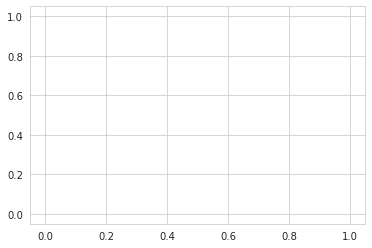

In [5]:
# now isolate interesting data for a specific country
countries = corona.countries
country = ''

# The structure 'corona[country]' contains a triple of numpy-arrays
# with days, cases and deaths. We assign them to three variables
# with 'simultaneous assignment'.
day, cases, deaths = corona[country]

#print(day)
#print(cases)

#print(deaths)
#b=np.subtract(cases, deaths)
#i=0
#while i <= len(cases):
 #   b=cases[i]-deaths[i]
  #  i+=1
#print(b)
#Axes.set_xlim(self, left=None, right=None, emit=True, auto=False, *, xmin=None, xmax=None)
plt.plot(day,cases)
#plt.xlim(0,30)
#plt.ylim(0,50000)
#plt.plot(day,cases)
#c=list(enumerate((cases)))
#print(c)
#e=max(cases)
#d=np.where(cases== e)
#print(d)
#print(e)

In [6]:
 so we can say since we se from the plot that the maximum no. of cases occur after 27 days so we can say that it will take atleast that much time to reach max infection again.....

SyntaxError: invalid syntax (<ipython-input-6-29471c192df0>, line 1)

The three arrays have the following intuitive meaning: At day 0 (1st of March 2020), 54 new COVID-19 infections and zero new deaths were reported from Germany and so on. 

We now can make a first plot with the new cases against the day.

In [ ]:
# The following command alone is sufficient to create the plot
plt.plot(day, cases)

# The following commands label the axes and the plot
plt.xlabel('day of COVID-19 pandemy')
plt.ylabel('new COVID-19 cases')
plt.title('Daily COVID-19 infections in India')

## Your tasks

**Note:** Please continue this notebook and do all the following tasks within that notebook. Please comment appropriately all code-blocks and perform the necessary discussions of your results in Markup cells. All plots must have appropriate axes-labels and a title! Your project submission will consist of the modified notebook.

The plot that we just created tells us that *new* infections have a decreasing trend. But to understand better the current state of the pandemy, we want to look at additional quantities.

1. Plot the *total accumulated number* of COVID-19 cases against the day. Give a short discussion on that plot. What kind of curve do you expect for a pandemy that can spread freely?  What effect do the current measures and restrictions in Germany (e.g. social distancing) have on the curve? Discuss this with the knowledge that drastic limitations on our life (closure of schools etc.) took effect in Germany on the 16th of March. What will the curve look like when the pandemy is over?
   
   **Hint:** Have a look at the `numpy` `cumsum`-function.
   
2. A very important quantity to decide whether current measures to confine the pandemy can be relaxed is the *development of the number of people who still can infect others (the infectious population)*. The main purpose of all COVID-19 restrictions is to realise a decreasing trend of that number! This quantity can be obtained by *the number of infected people minus those who died and minus those who recovered from COVID-19*. It is implicitely assumed in the following that recovered patients are immune against COVID-19.

   From the required information *only* the number of dead people is certain. The number of infected people is uncertain because we only have *reported* cases and we do not know how many people are infected but were not (yet) tested. Even more uncertain is the number of recovered patients and we entirely rely on an estimate for it. Furthermore, there are *many* definitions of *recoverd patients* around. The one coming closest to our procedure is the following: *A patient recovers if there are no symptoms 14-days after she was tested positively or after she left hospital.*
   
   Lacking further information, we define (overestimate) the number of recovered persons as follows: We consider everybody recovered who was positively tested more than 13-days ago and did not die.    
   Given these assumptions, create a plot of the infectious population as a function of pandemy-day for Germany. Discuss that plot. Assuming, the government withdrew all CVID-19 restrictions today and people immediately behaved as before the crisis, how long would it take until the number of infectious patients reaches again its all-time maximum?
   
   **Hint:** `numpy` array-slicing!
   
3. Create a loop over all countries with confirmed COVID-19 cases - see the hint below. List those countries who currently still have a *raising* infectious population. Limit the analysis to countries with more than 5000 confirmed COVID-19 cases.

   **Hint:** A raising infectious population means (for us) that the *derivative* of the plot from task (2) is positive today. 
   
**Note:** I include sample plots for tasks 1 and 2 from the 28th of March to the materials of this project. This allows you to verify your solution.   

In [ ]:
# Hint to create a loop over all countries.
#
# The countries of known COVID-19 cases are stored in a so-called list.
# A Python-list is, as the numpy-arrays, a container (in that case of strings)
# whose elements can be accessed and iterated over in a very similar way:
#for country in countries:
 #   print(country)

In [7]:
Pandemy that can spread freely - Gaussian

There is a subsequent decrese in the number of new cases.


if infection leads to immunity, successful social distancing also means 
that more people remain susceptible to the disease. As a result, once 
we lift the social distancing measures, the virus will quite possibly 
spread again as easily as it did before the lockdowns.

The pandemic wave, similarly, will be with us for the foreseeable future before it diminishes. 
But, depending on one’s geographic location and the policies in place, it will exhibit variegated
dimensions and dynamics traveling through time and space. we must be prepared for at least another 
18 to 24 months of significant Covid-19 activity, with hot spots popping up periodically in diverse 
geographic areas.



SyntaxError: invalid syntax (<ipython-input-7-7f5a02b37385>, line 1)

In [8]:
data.loc[(data['countriesAndTerritories'] == 'Germany'), 'cases'].sum()


178570

In [9]:
#plt.plot(day, cases)

[]


Text(0, 0.5, 'total cases')

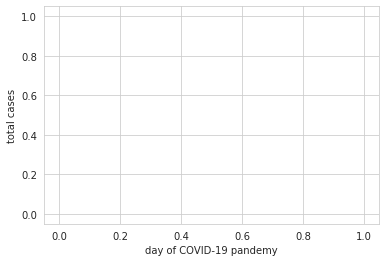

In [10]:
#for india
Y= np.cumsum(cases)
print(Y)
plt.plot(Y)
plt.xlabel('day of COVID-19 pandemy')
plt.ylabel('total cases')

In [11]:
#total cases of each country
dff = data.groupby("countriesAndTerritories").cases.sum()

print(dff)

countriesAndTerritories
Afghanistan       10582
Albania             998
Algeria            8306
Andorra             763
Angola               69
                  ...  
Vietnam             325
Western_Sahara        6
Yemen               222
Zambia              920
Zimbabwe             56
Name: cases, Length: 210, dtype: int64


In [12]:
dff = data.groupby(["day"]).cases.sum()

print(dff)

day
1     161124
2     173186
3     162568
4     164950
5     168351
6     154848
7     169459
8     176581
9     181385
10    183646
11    173793
12    161407
13    181214
14    166051
15    187961
16    192300
17    192970
18    181581
19    188686
20    198140
21    207944
22    228913
23    207953
24    222253
25    210500
26    154310
27    145312
28    133153
29    138158
30    137372
31     65591
Name: cases, dtype: int64


In [13]:
dff = data.groupby(["day"]).cases.sum()

print(dff)

day
1     161124
2     173186
3     162568
4     164950
5     168351
6     154848
7     169459
8     176581
9     181385
10    183646
11    173793
12    161407
13    181214
14    166051
15    187961
16    192300
17    192970
18    181581
19    188686
20    198140
21    207944
22    228913
23    207953
24    222253
25    210500
26    154310
27    145312
28    133153
29    138158
30    137372
31     65591
Name: cases, dtype: int64


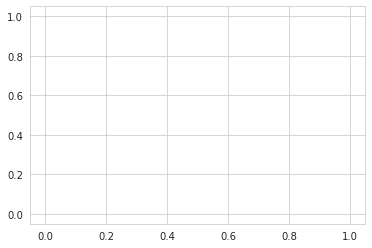

In [14]:
plt.plot(day, np.cumsum(cases))

In [15]:
for case in cases:
    print(cases)

In [17]:
corona = corona_data.CoronaData()

# The countries listed are accessed as member variable of the Corona class.
# We do not need them immediately but it comes in handy for your own tasks
# below.
countries = corona.countries
n=0
for country in countries:
    day, cases, countries=corona[country]
    if cases.sum() >= 5000:
        print(country)
        n+=1
print(n)
    

Afghanistan
Algeria
Argentina
Armenia
Australia
Austria
Bahrain
Bangladesh
Belarus
Belgium
Bolivia
Brazil
Canada
Chile
Colombia
Czechia
Denmark
Dominican_Republic
Ecuador
Egypt
Finland
France
Germany
Ghana
India
Indonesia
Iran
Ireland
Israel
Italy
Japan
Kazakhstan
Kuwait
Malaysia
Mexico
Moldova
Morocco
Netherlands
Nigeria
Norway
Oman
Pakistan
Panama
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russia
Saudi_Arabia
Serbia
Singapore
South_Africa
South_Korea
Spain
Sweden
Switzerland
Turkey
Ukraine
United_Arab_Emirates
United_Kingdom
United_States_of_America
63


In [20]:
corona = corona_data.CoronaData()

# The countries listed are accessed as member variable of the Corona class.
# We do not need them immediately but it comes in handy for your own tasks
# below.
countries = corona.countries

# Display some of them
print(countries[0:81:10])

['Afghanistan', 'Australia', 'Benin', 'Bulgaria', 'Chad', 'Curaçao', 'El_Salvador', 'France', 'Grenada']


In [29]:
for i in countries:
    day, cases, deaths = corona[i]
    

Afghanistan
Albania
Algeria
Andorra
Angola
Anguilla
Antigua_and_Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire, Saint Eustatius and Saba
Bosnia_and_Herzegovina
Botswana
Brazil
British_Virgin_Islands
Brunei_Darussalam
Bulgaria
Burkina_Faso
Burundi
Cambodia
Cameroon
Canada
Cape_Verde
Cases_on_an_international_conveyance_Japan
Cayman_Islands
Central_African_Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa_Rica
Cote_dIvoire
Croatia
Cuba
Curaçao
Cyprus
Czechia
Democratic_Republic_of_the_Congo
Denmark
Djibouti
Dominica
Dominican_Republic
Ecuador
Egypt
El_Salvador
Equatorial_Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Falkland_Islands_(Malvinas)
Faroe_Islands
Fiji
Finland
France
French_Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guam
Guatemala
Guernsey
Guinea
Guinea_Bissau
Guyana
Haiti
Holy_See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
I